**Sentiment analysis** is used to determine whether a given text contains negative, positive, or neutral emotions. It's a form of text analytics that uses natural language processing (NLP) and machine learning.

**Dataset Source** : https://www.kaggle.com/marklvl/sentiment-labelled-sentences-data-set

**Goal** : Determine whether the reviews given by customers are positive or negative, which is learned from previous reviews. 

#### 1. Import Library

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Get The Dataset

In [3]:
path = tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')
print(path)

139264/127831 [================================] - 0s 0us/step
/root/.keras/datasets/reviews.csv


In [4]:
# Get the csv file
dataset = pd.read_csv(path)
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


#### 3. Set Training and Testing Dataset
Divide the dataset into 2 parts, Training dataset and Testing dataset

In [5]:
sentences = dataset['text']
labels = dataset['sentiment']

# Separate sentenses and labels into training and tets dataset (80%-20%)
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size: ]

training_labels = labels[0:training_size]
testing_labels = labels[training_size: ]

# Transform labels into numpy array, this will be used for the network later on build model part
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

#### 4. Tokenization, Sequence,  and Padding Dataset

This step also known as Tweaking Model

In [6]:
vocab_size = 500
embedding_dim = 16
max_length = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#### 5. Build The Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 6)                 102       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 8,109
Trainable params: 8,109
Non-trainable params: 0
_________________________________________________________________


#### 6. Training Model

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

num_epochs = 30
history = model.fit(training_padded,
                    training_labels_final,
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
50/50 [==============================] - 2s 18ms/step - loss: 0.6916 - accuracy: 0.5223 - val_loss: 0.6997 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 1s 15ms/step - loss: 0.6887 - accuracy: 0.5229 - val_loss: 0.6978 - val_accuracy: 0.4135
Epoch 3/30
50/50 [==============================] - 1s 14ms/step - loss: 0.6856 - accuracy: 0.5474 - val_loss: 0.6954 - val_accuracy: 0.4386
Epoch 4/30
50/50 [==============================] - 1s 15ms/step - loss: 0.6814 - accuracy: 0.5581 - val_loss: 0.6903 - val_accuracy: 0.4887
Epoch 5/30
50/50 [==============================] - 1s 13ms/step - loss: 0.6757 - accuracy: 0.5895 - val_loss: 0.6816 - val_accuracy: 0.5689
Epoch 6/30
50/50 [==============================] - 1s 12ms/step - loss: 0.6677 - accuracy: 0.6447 - val_loss: 0.6837 - val_accuracy: 0.5113
Epoch 7/30
50/50 [==============================] - 1s 15ms/step - loss: 0.6565 - accuracy: 0.6648 - val_loss: 0.6681 - val_accuracy: 0.6040
Epoch 8/30
50

#### 7. Visualize Training Graph

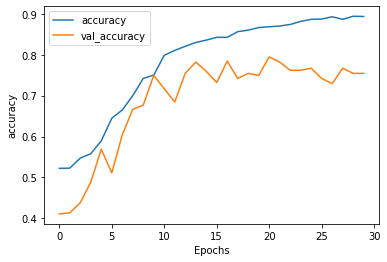

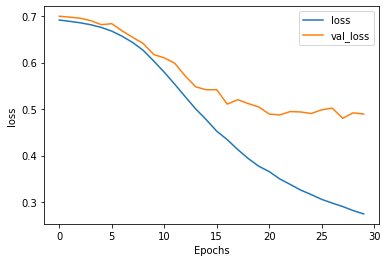

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

#### 8. Predict Some New Reviews

In [20]:
# Use the model to predict a review   
new_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']


# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(new_reviews)
new_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)           

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')              

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(new_reviews)):
  print(new_reviews[x])
  print(classes[x])
  print('\n')


HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

I love this phone
[0.8835538]


I hate spaghetti
[0.18146373]


Everything was cold
[0.5741985]


Everything was hot exactly as I wanted
[0.40828484]


Everything was green
[0.5741985]


the host seated us immediately
[0.54696524]


they gave us free chocolate cake
[0.8002856]


not sure about the wilted flowers on the table
[0.11329351]


only works when I stand on tippy toes
[0.809696]


does not work when I stand on my head
[0.02715263]




#### 9. Get files for visualizing the network in Tensorflow Projector

http://projector.tensorflow.org/


Loads vecs.tsv and meta file to the projector web to see the visualization

In [21]:
import io
# Get the weight of embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

# Create the reverse word index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(500, 16)


In [22]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>